In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
HLA_associations_path = os.path.abspath("../")
sys.path.append(HLA_associations_path)

import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import constants, index_tools, data_tools, medical_code_tools
from utilities import *
from analysis import *

import sys
sys.path.append(constants.GRANTHAM_DISTANCE_PATH)

import grantham_distance as gd

In [5]:
from tqdm.notebook import tqdm

In [6]:
sns.set_palette("tab10")
plt.rcParams.update({'figure.max_open_warning': 0})

In [7]:
loaded = False

# Load BioBank Components

In [8]:
DEV_MODE = False
SIGNIFIER = ""

if not loaded:
    (biobank_data_no_HLA_alleles, biobank_index,
     med_code_mapping) = data_tools.load_all_biobank_components(DEV_MODE, signifier=SIGNIFIER)
    loaded = True
    HLA_alleles = data_tools.load_HLA_data()
    biobank_data = biobank_data_no_HLA_alleles.merge(HLA_alleles, how="left", on="eid")

Importing BioBank Index and Data:
Missing 0 biobank index names
Reduced feature set has 376 features.
UK BioBank Data Loaded.
Size: 502536 rows x 376 columns
Elapsed time: 51.0528 seconds


Mapping Medical Codes:   0%|          | 0/361 [00:00<?, ? feature/s]

# All illnesses

In [9]:
data = biobank_data.sample(10000)

In [10]:
illness_codes = [feature for feature in biobank_data.columns if get_base_feature(feature) == "illness_code"]
all_illnesses = biobank_data[illness_codes].values.ravel()
all_illnesses, counts = np.unique(all_illnesses[~pd.isnull(all_illnesses)], return_counts=True)

In [11]:
illness_dict = {}
for illness in tqdm(all_illnesses):
    illness_dict[illness] = get_illness_value(data, illness, "illness_code")

  0%|          | 0/444 [00:00<?, ?it/s]

In [12]:
illness_data = pd.concat([data[["eid", "sex", "birth_year"]], pd.DataFrame(illness_dict)], axis=1)

In [13]:
illness_graph = np.zeros((len(all_illnesses), len(all_illnesses)))

In [14]:
for i, illness in enumerate(all_illnesses):
    illness_values = illness_data[illness].values
    for j, associated_illness in enumerate(all_illnesses):
        illness_graph[i, j] = np.sum(illness_values & illness_data[associated_illness].values)

In [15]:
unique_edge_weights = illness_graph[np.triu_indices(len(illness_graph))]
unique_edge_weights = unique_edge_weights[unique_edge_weights != 0]

C:\Users\Cole\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cole\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Cole\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Cole\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

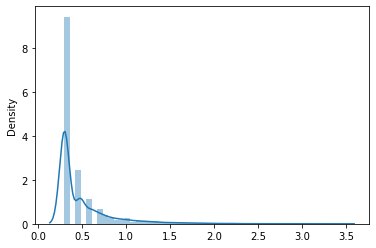

In [16]:
sns.distplot(np.log10(unique_edge_weights + 1))

In [17]:
df = pd.DataFrame(illness_graph, columns=all_illnesses)
df.index = all_illnesses
df

,abdominal hernia,abnormal smear (cervix),acne/acne vulgaris,acromegaly,acute infective polyneuritis/guillain-barre syndrome,adrenal tumour,adrenocortical insufficiency/addison's disease,alcohol dependency,alcoholic liver disease / alcoholic cirrhosis,allergy or anaphylactic reaction to drug,...,varicose veins,vasculitis,venous thromboembolic disease,vertigo,vitiligo,vocal cord polyp,wegners granulmatosis,whooping cough / pertussis,wolff parkinson white / wpw syndrome,yellow fever
abdominal hernia,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abnormal smear (cervix),0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acne/acne vulgaris,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
acromegaly,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acute infective polyneuritis/guillain-barre syndrome,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal cord polyp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
wegners granulmatosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
whooping cough / pertussis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
wolff parkinson white / wpw syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


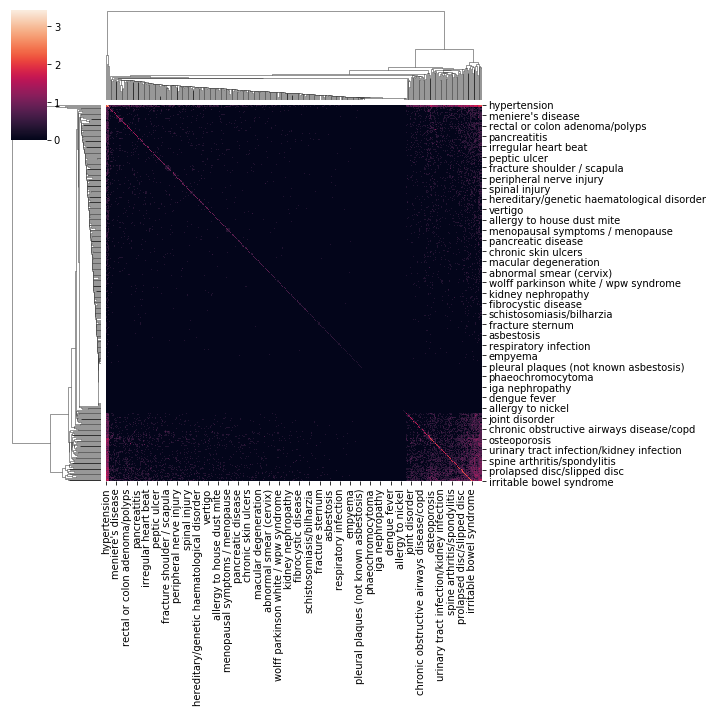

In [18]:
sns.clustermap(np.log10(df + 1))

In [19]:
from analysis import *

(0.7411753869698219, 0.000168839268877265)

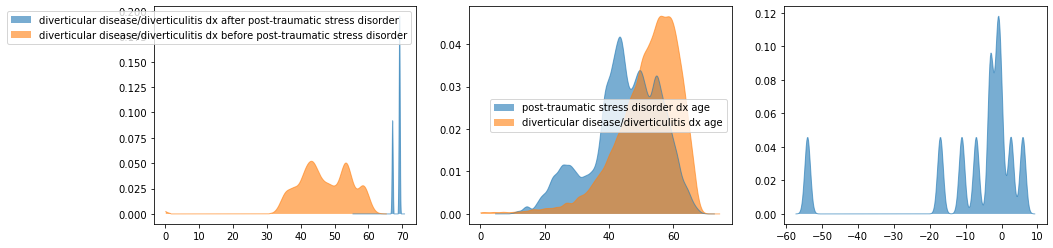

In [20]:
precursor_illness = "post-traumatic stress disorder"
illness = "diverticular disease/diverticulitis"

_, precursor_dx_ages = get_illness_value_dx_age(biobank_data, precursor_illness, "illness_code")
_, illness_dx_ages = get_illness_value_dx_age(biobank_data, illness, "illness_code")

precursor_before_illness = illness_dx_ages > precursor_dx_ages
precursor_values, illness_values = precursor_dx_ages >= 0, illness_dx_ages >= 0

fig, (a0, a1, a2) = plt.subplots(figsize=(16, 4), ncols=3)
params = dict(bw=0.1, clip=(0, None))
kde_plot(illness_dx_ages[precursor_values & precursor_before_illness],
         label=f"{illness} dx after {precursor_illness}", ax=a0, **params)
kde_plot(illness_dx_ages[precursor_values & ~precursor_before_illness & illness_values],
         label=f"{illness} dx before {precursor_illness}", ax=a0, **params)
kde_plot(precursor_dx_ages[precursor_values], label=f"{precursor_illness} dx age", ax=a1, **params)
kde_plot(illness_dx_ages[illness_values], label=f"{illness} dx age", ax=a1, **params)
kde_plot((illness_dx_ages - precursor_dx_ages)[precursor_values & illness_values], bw=.05, ax=a2)

preceding_event_test(precursor_dx_ages, illness_dx_ages)

In [21]:
np.random.seed(6)
some_illnesses_raw = sorted(np.random.choice(all_illnesses, 50))
some_illnesses_raw = all_illnesses

illness_dx_data = {}
for illness in tqdm(some_illnesses_raw, desc="Aggregating illness dates", unit=" illnesses"):
    new_illness_label = illness.replace(" ", "_")
    _, illness_dx_age = get_illness_value_dx_age(biobank_data, illness, "illness_code")
    illness_dx_data[new_illness_label] = illness_dx_age

illness_dx_data = pd.DataFrame(illness_dx_data)
some_illnesses = list(illness_dx_data.columns)

Aggregating illness dates:   0%|          | 0/444 [00:00<?, ? illnesses/s]

In [22]:
preceding_tests = []

pbar = tqdm(total=len(some_illnesses) ** 2, unit=" illnesses")


for illness in some_illnesses:
    illness_preceding_tests = []
    for precursor_illness in some_illnesses:
        if precursor_illness == illness:
            illness_preceding_tests.append(1)
        else:
            precursor_dx_ages, illness_dx_ages = illness_dx_data[precursor_illness], illness_dx_data[illness].values
            p, r = preceding_event_test(precursor_dx_ages, illness_dx_ages)
            illness_preceding_tests.append(r)
        pbar.update(1)

    preceding_tests.append(illness_preceding_tests)
pbar.close()

preceding_tests = pd.DataFrame(preceding_tests, columns=some_illnesses)
preceding_tests.index = some_illnesses

  0%|          | 0/197136 [00:00<?, ? illnesses/s]

In [23]:
preceding_tests

,abdominal_hernia,abnormal_smear_(cervix),acne/acne_vulgaris,acromegaly,acute_infective_polyneuritis/guillain-barre_syndrome,adrenal_tumour,adrenocortical_insufficiency/addison's_disease,alcohol_dependency,alcoholic_liver_disease_/_alcoholic_cirrhosis,allergy_or_anaphylactic_reaction_to_drug,...,varicose_veins,vasculitis,venous_thromboembolic_disease,vertigo,vitiligo,vocal_cord_polyp,wegners_granulmatosis,whooping_cough_/_pertussis,wolff_parkinson_white_/_wpw_syndrome,yellow_fever
abdominal_hernia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335652,...,0.096525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_smear_(cervix),NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400481,...,0.227919,NaN,NaN,0.166417,NaN,NaN,NaN,0.128795,NaN,NaN
acne/acne_vulgaris,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.373692,...,0.426655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromegaly,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acute_infective_polyneuritis/guillain-barre_syndrome,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal_cord_polyp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562114,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
wegners_granulmatosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
whooping_cough_/_pertussis,NaN,0.128373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
wolff_parkinson_white_/_wpw_syndrome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [25]:
for col in preceding_tests.columns:
    for index in preceding_tests.index:
        if preceding_tests.loc[index, col] < 0.01:
            print(col, " -> ",  index, preceding_tests.loc[index, col])

abnormal_smear_(cervix)  ->  ear/vestibular_disorder 0.007185761543618859
acne/acne_vulgaris  ->  diabetes 0.007959556843599433
acne/acne_vulgaris  ->  hayfever/allergic_rhinitis 0.00796859333904472
acne/acne_vulgaris  ->  hypothyroidism/myxoedema 6.594105140746902e-05
acromegaly  ->  hypothyroidism/myxoedema 0.009310972558139142
acromegaly  ->  pituitary_adenoma/tumour 0.008744529738409706
acute_infective_polyneuritis/guillain-barre_syndrome  ->  angina 0.0066674157522361105
adrenal_tumour  ->  hypertension 8.082616378083781e-06
adrenocortical_insufficiency/addison's_disease  ->  hypothyroidism/myxoedema 2.6319674139042613e-12
alcohol_dependency  ->  anxiety/panic_attacks 0.0013554407458666116
alcohol_dependency  ->  depression 1.9950971945694287e-12
alcohol_dependency  ->  epilepsy 0.0006715297039529286
alcohol_dependency  ->  glaucoma 0.0026796156657350753
alcohol_dependency  ->  hypertension 0.00010421284380671505
alcohol_dependency  ->  peritonitis 0.00010791717181503027
alcoholic

bph_/_benign_prostatic_hypertrophy  ->  cataract 0.001314785845484933
bph_/_benign_prostatic_hypertrophy  ->  depression 9.43458879534727e-05
bph_/_benign_prostatic_hypertrophy  ->  disc_degeneration 0.005201548494980815
bph_/_benign_prostatic_hypertrophy  ->  migraine 0.004029659145543544
brain_haemorrhage  ->  high_cholesterol 0.0007777117096016058
breast_cysts  ->  appendicitis 0.006405509944486765
breast_cysts  ->  asthma 0.0003631488023989156
breast_cysts  ->  deep_venous_thrombosis_(dvt) 0.006800114374668146
bronchiectasis  ->  asthma 0.0035867566923056897
bronchiectasis  ->  bronchitis 0.0006731296492638298
bronchiectasis  ->  diverticular_disease/diverticulitis 0.009395194586589262
bronchiectasis  ->  emphysema/chronic_bronchitis 0.00041423470686555706
bronchiectasis  ->  pneumonia 9.719674946290083e-05
bronchiectasis  ->  sarcoidosis 0.006424334487474958
bronchitis  ->  asthma 0.002205401601945151
bronchitis  ->  emphysema 0.003224269365966236
bronchitis  ->  eye_infection 0.0

diabetic_eye_disease  ->  hypertension 5.0347868866858644e-24
diabetic_eye_disease  ->  iron_deficiency_anaemia 0.008734670577478352
diabetic_eye_disease  ->  osteoarthritis 0.001588381382866888
diabetic_eye_disease  ->  osteomyelitis 0.00021152116506683156
diabetic_eye_disease  ->  renal_failure_requiring_dialysis 0.000651894973670402
diabetic_eye_disease  ->  type_1_diabetes 0.004695520553244407
diabetic_eye_disease  ->  type_2_diabetes 1.6751487451915416e-29
diabetic_nephropathy  ->  diabetes 0.000991541106514172
diabetic_neuropathy/ulcers  ->  diabetes 8.058754930169723e-15
diabetic_neuropathy/ulcers  ->  high_cholesterol 0.00033248591719838824
diabetic_neuropathy/ulcers  ->  hypertension 0.0001305461302261085
diabetic_neuropathy/ulcers  ->  type_2_diabetes 2.328248044061886e-08
disc_degeneration  ->  back_pain 8.42673241431651e-06
disc_degeneration  ->  bph_/_benign_prostatic_hypertrophy 0.005413260910520263
disc_degeneration  ->  iron_deficiency_anaemia 9.562191960147243e-05
disc

fracture_radius  ->  fracture_wrist_/_colles_fracture 0.00723780200369289
fracture_radius  ->  osteoporosis 0.0003193439205273345
fracture_rib  ->  fracture_clavicle_/_collar_bone 0.0020609656906519077
fracture_rib  ->  fracture_foot 0.00607192231309778
fracture_rib  ->  fracture_lower_leg_/_ankle 0.007072662896888914
fracture_rib  ->  fracture_pelvis 0.00333656401666508
fracture_rib  ->  fracture_shoulder_/_scapula 2.3581313187198008e-06
fracture_rib  ->  fracture_upper_arm_/_humerus_/_elbow 0.009276520930876522
fracture_rib  ->  fracture_vertebra_/_crush_fracture_/_vertebral_collapse 0.008849429292571499
fracture_rib  ->  fracture_wrist_/_colles_fracture 0.006716598915312686
fracture_rib  ->  muscle_or_soft_tissue_injuries 0.004388453620310477
fracture_rib  ->  pneumothorax 0.0003737729810483341
fracture_shaft_of_femur  ->  fracture_face_/_orbit_/_eye_socket 0.000708753197165711
fracture_shaft_of_femur  ->  fracture_fibula 0.00017323652667057952
fracture_shaft_of_femur  ->  fracture_

hereditary/genetic_haematological_disorder  ->  deep_venous_thrombosis_(dvt) 0.0017693757123552652
hereditary/genetic_haematological_disorder  ->  diverticular_disease/diverticulitis 0.00208912804695579
hereditary/genetic_haematological_disorder  ->  hiatus_hernia 0.007264169678749086
hereditary/genetic_haematological_disorder  ->  hypertension 0.0027908499753367235
hereditary/genetic_haematological_disorder  ->  osteoarthritis 3.533126668788692e-05
hereditary/genetic_haematological_disorder  ->  osteoporosis 0.004498455364192881
hereditary/genetic_haematological_disorder  ->  polymyalgia_rheumatica 0.0027406984014286175
hereditary/genetic_haematological_disorder  ->  pulmonary_embolism_+/-_dvt 0.008399475773773507
hereditary/genetic_haematological_disorder  ->  stroke 0.0053928853828464855
hereditary/genetic_haematological_disorder  ->  unclassifiable 0.0009899586518962093
hiatus_hernia  ->  asbestosis 0.006715612355753909
hiatus_hernia  ->  asthma 2.815023445498736e-07
hiatus_hernia 

lymphoedema  ->  osteoarthritis 0.00562070641483778
macular_degeneration  ->  heart_valve_problem/heart_murmur 0.008573428682257935
malabsorption/coeliac_disease  ->  anaemia 0.003420258575557634
malabsorption/coeliac_disease  ->  angina 4.460709148270546e-05
malabsorption/coeliac_disease  ->  diabetes 2.77092579370086e-06
malabsorption/coeliac_disease  ->  gastro-oesophageal_reflux_(gord)_/_gastric_reflux 0.000695619085401454
malabsorption/coeliac_disease  ->  hiatus_hernia 2.0695464707581327e-06
malabsorption/coeliac_disease  ->  hypothyroidism/myxoedema 2.220343917890321e-10
malabsorption/coeliac_disease  ->  iron_deficiency_anaemia 3.384657612238954e-05
malabsorption/coeliac_disease  ->  irritable_bowel_syndrome 0.0016221110639511134
malabsorption/coeliac_disease  ->  osteoarthritis 0.004505869925753996
malabsorption/coeliac_disease  ->  osteoporosis 2.414078306262263e-10
malabsorption/coeliac_disease  ->  pernicious_anaemia 0.002277510645300418
malabsorption/coeliac_disease  ->  v

peritonitis  ->  renal_failure_not_requiring_dialysis 2.5723048698444414e-05
peritonitis  ->  renal_failure_requiring_dialysis 0.001070295458754321
peritonitis  ->  septicaemia_/_sepsis 2.3875991246189854e-06
peritonitis  ->  ulcerative_colitis 0.0014568984590971146
peritonitis  ->  unclassifiable 0.00021066731197568836
peritonitis  ->  uterine_fibroids 0.0002591609377373944
pernicious_anaemia  ->  angina 9.371592423610707e-05
pernicious_anaemia  ->  chronic_obstructive_airways_disease/copd 0.00896541514167486
pernicious_anaemia  ->  crohns_disease 0.0012132226221935644
pernicious_anaemia  ->  diabetes 1.2276489459068407e-12
pernicious_anaemia  ->  fracture_fibula 0.009701383632051688
pernicious_anaemia  ->  heart_attack/myocardial_infarction 0.0001247660697337009
pernicious_anaemia  ->  high_cholesterol 1.303260384723574e-10
pernicious_anaemia  ->  hypertension 1.0739543973049407e-05
pernicious_anaemia  ->  hypothyroidism/myxoedema 1.5215611427731787e-16
pernicious_anaemia  ->  malabs

septicaemia_/_sepsis  ->  pneumonia 0.0012480675205917909
shingles  ->  enlarged_prostate 0.0011691029287867842
shingles  ->  glaucoma 0.007811990538192196
sickle_cell_disease  ->  hypertension 0.00035337304821705896
sjogren's_syndrome/sicca_syndrome  ->  clotting_disorder/excessive_bleeding 0.0019200542510079204
sjogren's_syndrome/sicca_syndrome  ->  dry_eyes 2.7312509785282926e-06
sjogren's_syndrome/sicca_syndrome  ->  high_cholesterol 0.006997860734617986
sjogren's_syndrome/sicca_syndrome  ->  osteoarthritis 1.6662921304656459e-06
sjogren's_syndrome/sicca_syndrome  ->  rheumatoid_arthritis 2.5567483508585116e-07
sjogren's_syndrome/sicca_syndrome  ->  stroke 0.0006743425375925695
sleep_apnoea  ->  angina 1.835837446971295e-07
sleep_apnoea  ->  anxiety/panic_attacks 0.0020853430509362144
sleep_apnoea  ->  atrial_fibrillation 4.5103606005731766e-05
sleep_apnoea  ->  bladder_problem_(not_cancer) 0.0005985549508874961
sleep_apnoea  ->  chronic_obstructive_airways_disease/copd 4.904763664

varicose_veins  ->  inguinal_hernia 0.009673275678042055
vasculitis  ->  hypertension 0.009454896303698654
vertigo  ->  depression 0.0057919215760416564
vertigo  ->  high_cholesterol 0.008311170268215179
vertigo  ->  osteoarthritis 0.007351390720250933
vertigo  ->  tinnitus_/_tiniitis 0.0025362747425763605
vitiligo  ->  lichen_sclerosis 0.0020172090349384144
vocal_cord_polyp  ->  gastro-oesophageal_reflux_(gord)_/_gastric_reflux 0.001477551307178387
wegners_granulmatosis  ->  hypertension 0.0008264660339462476
whooping_cough_/_pertussis  ->  chickenpox 1.7847561418090504e-05
whooping_cough_/_pertussis  ->  joint_pain 0.0012537272708707918
whooping_cough_/_pertussis  ->  measles_/_morbillivirus 2.215631770586902e-06
whooping_cough_/_pertussis  ->  pneumonia 2.253894885866489e-06
whooping_cough_/_pertussis  ->  shingles 0.0008601675425652217


In [24]:
significant = preceding_tests.loc[preceding_tests.lt(0.05).any(axis=1), preceding_tests.lt(0.05).any()]
significant

,abdominal_hernia,abnormal_smear_(cervix),acne/acne_vulgaris,acromegaly,acute_infective_polyneuritis/guillain-barre_syndrome,adrenal_tumour,adrenocortical_insufficiency/addison's_disease,alcohol_dependency,alcoholic_liver_disease_/_alcoholic_cirrhosis,allergy_or_anaphylactic_reaction_to_drug,...,varicose_ulcer,varicose_veins,vasculitis,venous_thromboembolic_disease,vertigo,vitiligo,vocal_cord_polyp,wegners_granulmatosis,whooping_cough_/_pertussis,wolff_parkinson_white_/_wpw_syndrome
abdominal_hernia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335652,...,NaN,0.096525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_smear_(cervix),NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400481,...,NaN,0.227919,NaN,NaN,0.166417,NaN,NaN,NaN,0.128795,NaN
acne/acne_vulgaris,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.373692,...,NaN,0.426655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromegaly,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acute_infective_polyneuritis/guillain-barre_syndrome,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vasculitis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vertigo,NaN,0.024112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.599731,...,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
vitiligo,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
wegners_granulmatosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


'C:\\Users\\Cole\\Documents\\_drive\\columbia_education\\research\\rabadan_lab\\HLA_genotype_associations\\resources\\cached_data\\all_illness_preceding_tests.csv'

In [50]:
df = pd.read_csv(os.path.join(constants.RESOURCES_DIR_PATH, "cached_data", "all_illness_preceding_tests.csv"))
df.index = df["Unnamed: 0"].values
df = df.drop(["Unnamed: 0"], axis="columns")
df

,abdominal_hernia,abnormal_smear_(cervix),acne/acne_vulgaris,acromegaly,acute_infective_polyneuritis/guillain-barre_syndrome,adrenal_tumour,adrenocortical_insufficiency/addison's_disease,alcohol_dependency,alcoholic_liver_disease_/_alcoholic_cirrhosis,allergy_or_anaphylactic_reaction_to_drug,...,varicose_veins,vasculitis,venous_thromboembolic_disease,vertigo,vitiligo,vocal_cord_polyp,wegners_granulmatosis,whooping_cough_/_pertussis,wolff_parkinson_white_/_wpw_syndrome,yellow_fever
abdominal_hernia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335652,...,0.096525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_smear_(cervix),NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400481,...,0.227919,NaN,NaN,0.166417,NaN,NaN,NaN,0.128795,NaN,NaN
acne/acne_vulgaris,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.373692,...,0.426655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromegaly,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acute_infective_polyneuritis/guillain-barre_syndrome,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal_cord_polyp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562114,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
wegners_granulmatosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
whooping_cough_/_pertussis,NaN,0.128373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
wolff_parkinson_white_/_wpw_syndrome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
